# **Smart Manufacturing Process Data EDA**

*시계열 데이터 분석*

About this file

This file contains time-series data collected from a smart manufacturing system, including machine temperature, speed, vibration levels, energy consumption, and quality scores. 

Each row represents one minute of operational data, with a binary indicator showing whether optimal operating conditions were met. 

Ideal for predictive maintenance, energy analysis, and quality control tasks.

이 데이터는 스마트 공정 시스템에서 수집한 시계열 데이터로, 기계 온도, 속도, 진동 단계, 에너지 소비량, 품질 점수를 포함한다. 

각 행은 1분 단위의 데이터를 의미하며, Optimal Conditions를 통해 최적 조건을 만족했는지 나타낸다. 

예측 유지보수, 에너지 소비 분석, 품질 관리 문제에 적합한 데이터셋이다. 

# 사전준비

## 필요 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 EDA

In [6]:
data_path  = "../data/raw/Manufacturing_dataset.csv"
df = pd.read_csv(data_path)
df.head()

,Timestamp,Temperature (°C),Machine Speed (RPM),Production Quality Score,Vibration Level (mm/s),Energy Consumption (kWh),Optimal Conditions
0,2025-04-01 08:00:00,78.92,1461,8.49,0.07,1.97,0
1,2025-04-01 08:01:00,71.83,1549,8.97,0.04,1.01,0
2,2025-04-01 08:02:00,74.88,1498,8.52,0.08,1.60,0
3,2025-04-01 08:03:00,77.27,1478,8.28,0.09,1.87,0
4,2025-04-01 08:04:00,76.50,1524,8.07,0.04,1.53,0


데이터는 총 7개의 column으로 구성되어 있으며, Optimal Condition의 경우 해당 시점의 공정이 최적 상태일 경우 1, 그렇지 않은 경우 0으로 표현된다. 

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 10000 non-null  object 
 1   Temperature (°C)          10000 non-null  float64
 2   Machine Speed (RPM)       10000 non-null  int64  
 3   Production Quality Score  10000 non-null  float64
 4   Vibration Level (mm/s)    10000 non-null  float64
 5   Energy Consumption (kWh)  10000 non-null  float64
 6   Optimal Conditions        10000 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 547.0+ KB
None


데이터는 총 10000개의 행으로 구성되어 있으며, 결측치는 존재하지 않는다. 

In [8]:
df.describe()

,Temperature (°C),Machine Speed (RPM),Production Quality Score,Vibration Level (mm/s),Energy Consumption (kWh),Optimal Conditions
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,74.989407,1499.562400,8.500839,0.065218,1.499053,0.096600
std,1.985371,29.059738,0.287774,0.020607,0.288139,0.295427
min,67.580000,1450.000000,8.000000,0.030000,1.000000,0.000000
25%,73.660000,1474.000000,8.250000,0.050000,1.250000,0.000000
50%,75.000000,1500.000000,8.500000,0.070000,1.500000,0.000000
75%,76.340000,1525.000000,8.750000,0.080000,1.750000,0.000000
max,82.470000,1549.000000,9.000000,0.100000,2.000000,1.000000


Temperature, Machine Speed, Production Quality Score, Vibration Level, Energy Consumption은 모두 좁은 범위에 존재하는 수치이다. 

Optimal Condition의 경우 평균이 약 0.096으로, 최적 공정 상태(1)이 그렇지 않은 경우(0)보다 훨씬 적음을 추론 가능하다. 

## 이상치 확인

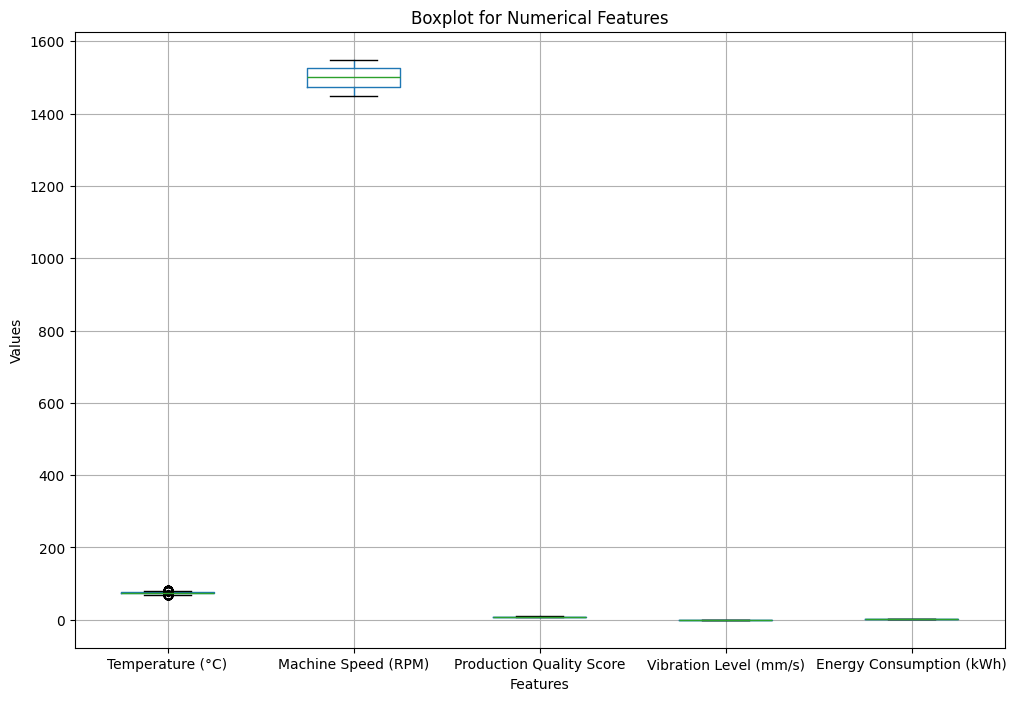

In [10]:
# 이상치 확인
plt.figure(figsize=(12, 8))
df.boxplot(column=['Temperature (°C)', 'Machine Speed (RPM)', 'Production Quality Score', 'Vibration Level (mm/s)', 'Energy Consumption (kWh)'])
plt.title('Boxplot for Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

Boxplot으로 확인 결과, 모든 feature에서 이상치로 탐지되는 수치는 존재하지 않는다. 